# Importing libraires

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
path = r'C:\Users\aaron\OneDrive\Desktop\Health Insurance Analysis'

In [7]:
path

'C:\\Users\\aaron\\OneDrive\\Desktop\\Health Insurance Analysis'

In [9]:
# installing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'insurance_checked.csv'), index_col = False)

In [11]:
print(matplotlib.__version__)

3.10.0


In [13]:
%matplotlib inline

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [17]:
df.shape

(1338, 7)

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
# getting rid of column sex, column smoker, and column region because they are not continuoys variables.
sub = df[['age', 'bmi', 'children', 'charges']]

In [25]:
sub

,age,bmi,children,charges
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.8,0,1629.83
1336,21,25.8,0,2007.94


In [27]:
# Create a correlation matrix using pandas
sub.corr()

,age,bmi,children,charges
age,1.000000,0.109318,0.042469,0.299008
bmi,0.109318,1.000000,0.012743,0.198529
children,0.042469,0.012743,1.000000,0.067998
charges,0.299008,0.198529,0.067998,1.000000


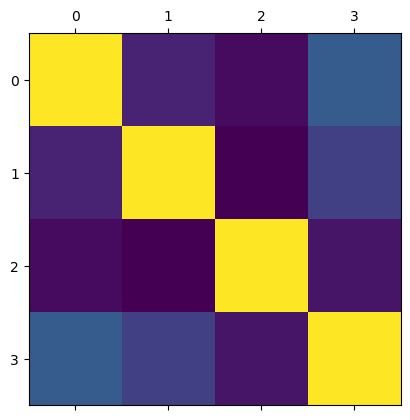

In [31]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

<Figure size 400x400 with 0 Axes>

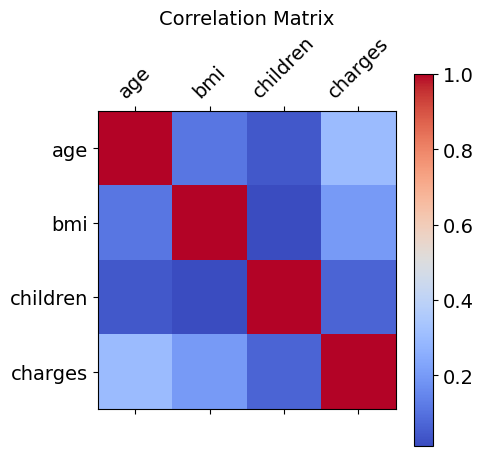

In [49]:
f = plt.figure(figsize=(4, 4)) # figure size 
plt.matshow(sub.corr(), cmap='coolwarm') # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.show(1)

# creating a correlation heatmap using seaborn

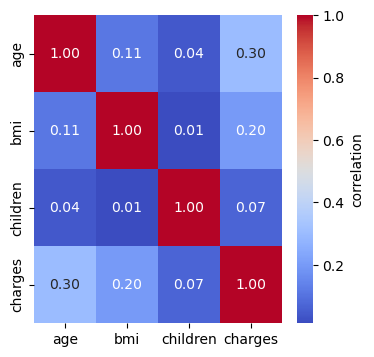

In [59]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot =True, ax=ax, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'correlation'}) # The `annot` argument allows the plot to 
# place the correlation coefficients onto the heatmap.
plt.show(1)

# a coefficient against itself will alwasy be a strong positive correlation of 1.0
# the age of an indivdual related to the charges for insurance have a small positive correlation
# bmi related to charges for insurance have a small positive correlation

# Create a scatterplot

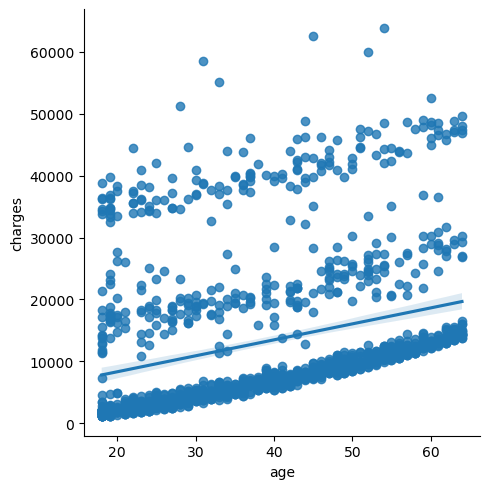

In [65]:
# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships
sns.lmplot(x ='age', y = 'charges', data = sub)
plt.show(1)

The scatter plot shows the relationship between age and charges. It appears that there is a positive correlation between the two variables, meaning that as age increases, so do the medical charges. There are a few outliers in the plot, with some individuals in their 20s and 30s having higher than average charges, and some older individuals having lower than average charges. The plot also shows a cluster of data points around the lower age and lower charge range, indicating that there are many younger individuals in the dataset with relatively low medical charges. Overall, the plot suggests that age is a significant factor in determining medical charges.

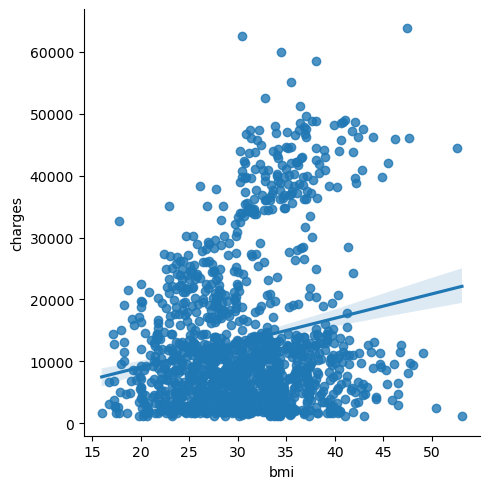

In [69]:
sns.lmplot(x ='bmi', y = 'charges', data = df)
plt.show(1)

In the given dataset, there is a positive correlation between BMI and charges, indicating that individuals with a higher BMI tend to have higher medical charges. This can be seen in the scatterplot where the points are generally positively sloped. The spread of data points is wider in the lower range of BMI and charges but gets narrower and more dense as the values of BMI and charges increase. There are some outliers where individuals with relatively high BMI values have lower charges and individuals with relatively low BMI values have higher charges. Overall, the correlation suggests that BMI can be a factor in determining medical charges for individuals.

# Create a pair plot of the entire data set 

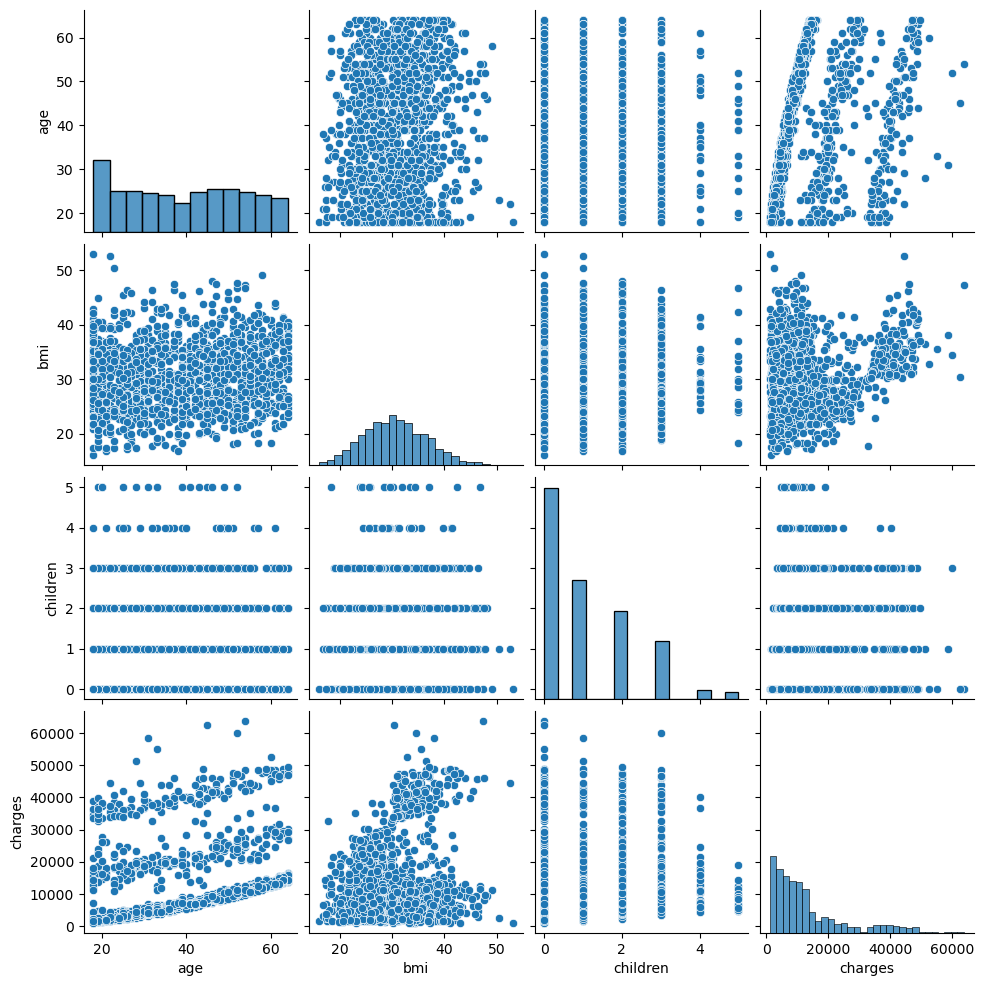

In [77]:
g = sns.pairplot(sub)
plt.show(1)

# Create a categorical plot and interpret the results

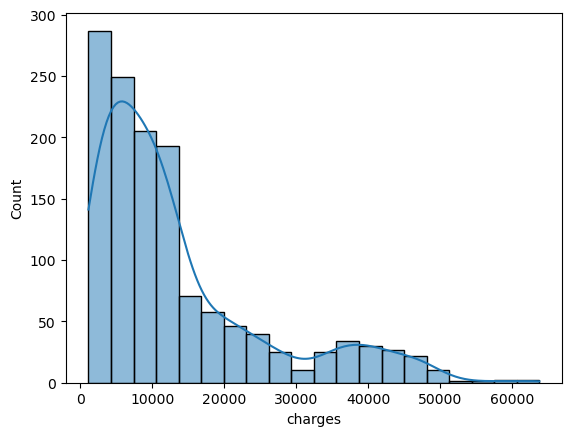

In [82]:
sns.histplot(sub['charges'], bins = 20, kde = True)
plt.show(1)

In [92]:
df.loc[sub['charges'] < 10000, 'Price category'] = 'Low price'

In [94]:
df.loc[(sub['charges'] >= 10000) & (sub['charges'] < 25000), 'Price category'] = 'Middle price'

In [96]:
df.loc[sub['charges'] >= 25000, 'Price category'] = 'High price'

In [98]:
df['Price category'].value_counts(dropna = False)

Price category
Low price       712
Middle price    425
High price      201
Name: count, dtype: int64

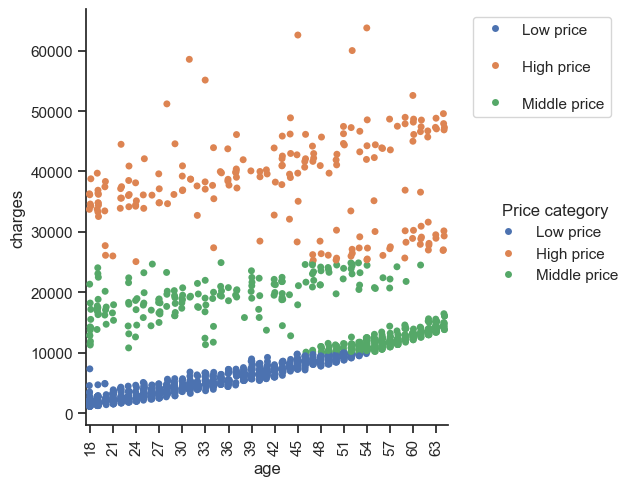

In [172]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="age", y="charges", hue="Price category", data=df) 
plt.legend(labelspacing=1.5, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
x_ticks = np.arange(0, len(df['age'].unique()), 3) 
plt.xticks(x_ticks, rotation=90)
plt.show(1)

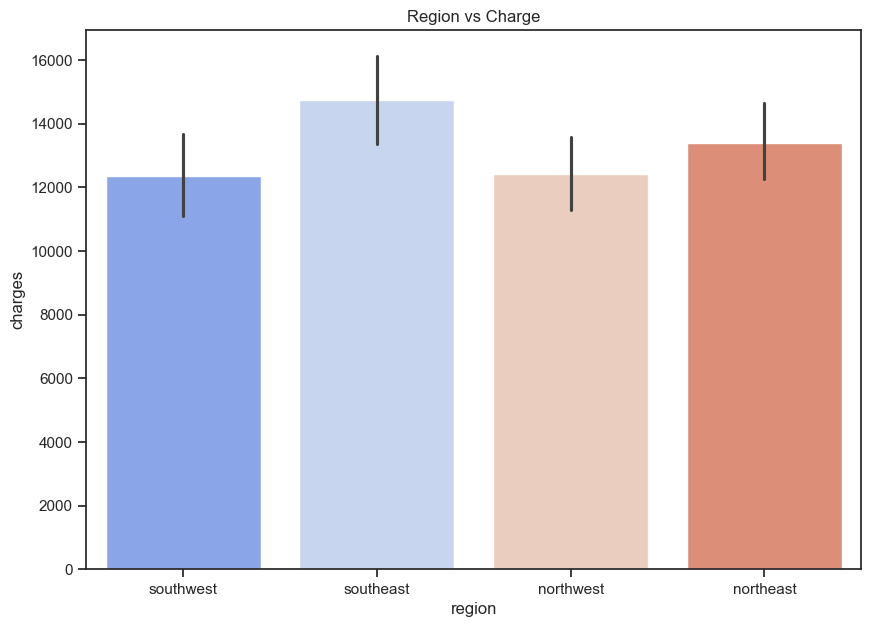

In [116]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df, hue= 'region', palette = 'coolwarm')
plt.show(1)

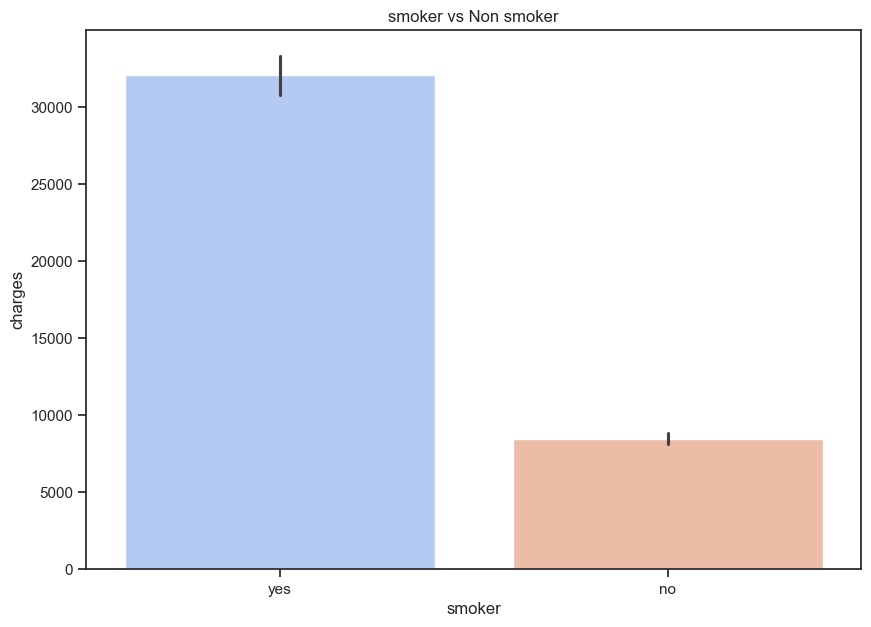

In [184]:
plt.figure(figsize=(10,7))
plt.title('smoker vs Non smoker')
sns.barplot(x='smoker',y='charges',data=df, hue= 'smoker', palette = 'coolwarm')
plt.show(1)

# Questions 
* Does health insurance cost increase because of smoking?

  
  Health insurance does increase because of smoking.
  
* Does health insurance cost increase because of the number of dependents?

  
  It does increase a little becuase of children but not a significant difference

  
* Is health insurance consistently higher in a specific region?

  
  yes, health insurance is higher in a specific region, the southeast region

  
* Does health insurance cost increase base off an individual’s BMI?

  
  bmi can be a factor in people with higher health insurance

  
* Do people above the age of 40 have higher insurance costs?

  
  yes, individuals above 40 do have higher insurance cost


# Hypotheses
* people who smoke tend to have a higher insurance than people who don't smoke.
* Insurance is typically higher when an individual has more than one attribute associated with smoking.* People over the age of 40 have a higher insurance than people below 40 years old.